In [1]:
# import required modules for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create dataframes from all csv files to read the data (KPMG)
# customer trasaction dataframe
transactions_df=pd.read_csv("C:/Users/nidhi/Documents/CPSC597/KPMG_transaction.csv")

In [3]:
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,1/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [4]:
# current customers demographic details dataframe
currentcustomers_df=pd.read_csv("C:/Users/nidhi/Documents/CPSC597/KPMG_current_customers.csv")

In [5]:
currentcustomers_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,#VALUE!,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,122,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,122,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,122,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,122,Senior Sales Associate,IT,Mass Customer,N,No,NaN


In [6]:
current_customer_address_df=pd.read_csv("C:/Users/nidhi/Documents/CPSC597/KPMG_cust.address.csv")

In [7]:
current_customer_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [8]:
# new customers information dataframe
new_customers_df=pd.read_csv("C:/Users/nidhi/Documents/CPSC597/KPMG_new_customers.csv")

In [9]:
new_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [10]:
############################  customers transactions - Data exploration ############################################
# find columns and details datatype of each column
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [11]:
# finding relation between customers and transactions and type of transactions
trdf = pd.read_csv("C:/Users/nidhi/Documents/CPSC597/KPMG_transaction.csv", usecols=['customer_id','transaction_id','online_order'])
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  20000 non-null  int64 
 1   customer_id     20000 non-null  int64 
 2   online_order    19640 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [12]:
# trcountpercust is counts of number of transactions rows for one unique customer
trcountpercust = trdf['customer_id'].value_counts()
print(trcountpercust)
# print(trdf.groupby(['customer_id']).count())

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64


In [13]:
# visualization of customer purchase
# trcountpercust.plot(kind='barh')
# sbrn.countplot(y='customer_id',data=trdf)
# trdf['customer_id'].value_counts().plot.barh(color='red')
# trdf.customer_id.value_counts().sort_values().plot(kind = 'barh')
unique_trans_count=trcountpercust.unique()
print(unique_trans_count)

[14 13 12 11 10  9  8  7  6  5  4  3  2  1]


In [14]:
print("online_order data categories:",transactions_df['online_order'].unique())
print("order_status data categories:",transactions_df['order_status'].unique())
print("brand data categories:",transactions_df['brand'].unique())
print("product_line data categories:",transactions_df['product_line'].unique())
print("product_class data categories:",transactions_df['product_class'].unique())
print("product_size data categories:",transactions_df['product_size'].unique())

online_order data categories: [False True nan]
order_status data categories: ['Approved' 'Cancelled']
brand data categories: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line data categories: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class data categories: ['medium' 'low' 'high' nan]
product_size data categories: ['medium' 'large' 'small' nan]


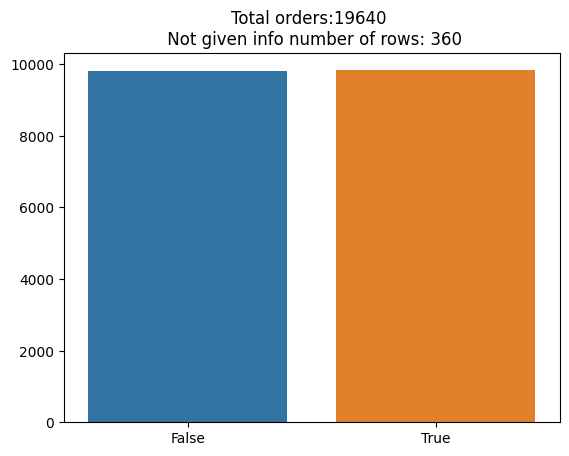

In [15]:
# visualization on classification on columns: online_order, order_status,brand,product_line,product_class,product_size
# Also shows the total number of data used for plot
# online_order_Cat
online_order_cat=transactions_df['online_order'].value_counts()
sns.barplot(x=online_order_cat.index, y =online_order_cat.values).set(title=f"Total orders:{transactions_df['online_order'].count()} \n Not given info number of rows: {transactions_df['online_order'].isna().sum()}")
plt.show()

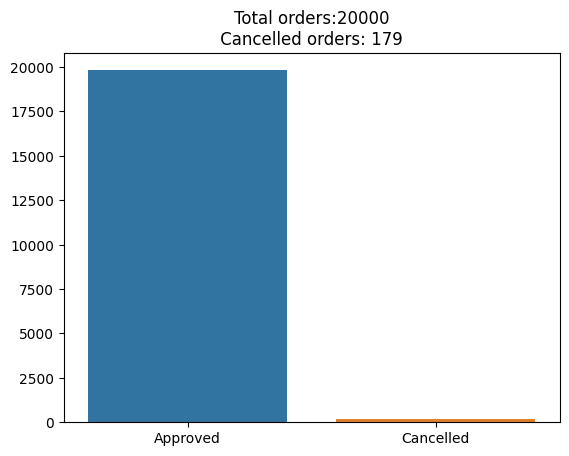

In [16]:
# order_Status_cat
order_status_cat=transactions_df['order_status'].value_counts()
cancelled_order= (transactions_df['order_status'].values == "Cancelled").sum()
sns.barplot(x=order_status_cat.index, y =order_status_cat.values).set(title=f"Total orders:{transactions_df['order_status'].count()}\n Cancelled orders: {cancelled_order} ")
plt.show()

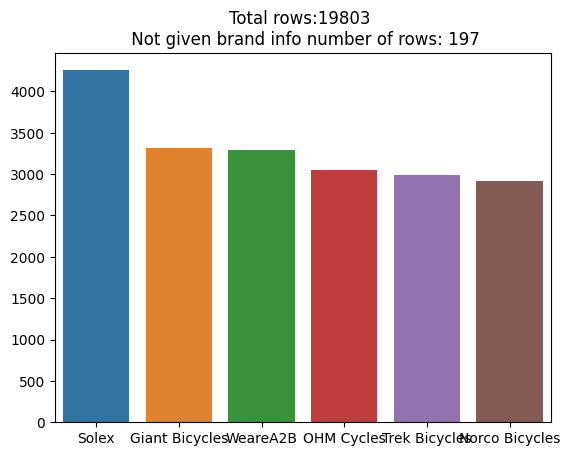

In [17]:
# product_brand
product_brand_cat=transactions_df['brand'].value_counts()
sns.barplot(x=product_brand_cat.index, y =product_brand_cat.values).set(title=f"Total rows:{transactions_df['brand'].count()} \n Not given brand info number of rows: {transactions_df['brand'].isna().sum()}")
plt.show()

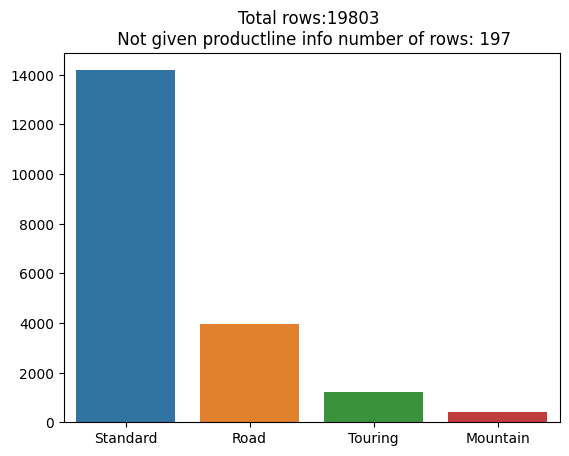

In [18]:
# product_line
product_line_cat=transactions_df['product_line'].value_counts()
sns.barplot(x=product_line_cat.index, y =product_line_cat.values).set(title=f"Total rows:{transactions_df['product_line'].count()} \n Not given productline info number of rows: {transactions_df['product_line'].isna().sum()}")
plt.show()

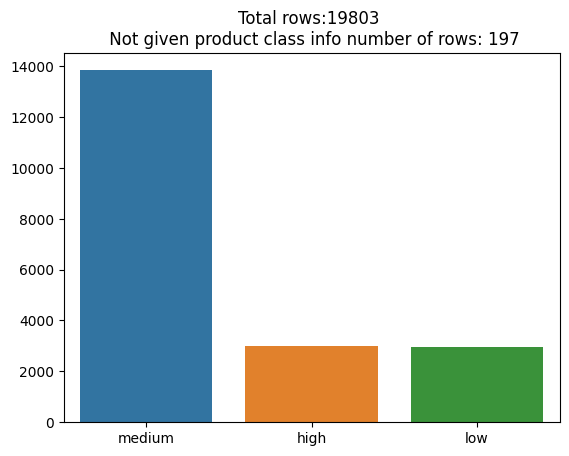

In [19]:
# product_class
product_class_cat=transactions_df['product_class'].value_counts()
sns.barplot(x=product_class_cat.index, y =product_class_cat.values).set(title=f"Total rows:{transactions_df['product_class'].count()} \n Not given product class info number of rows: {transactions_df['product_class'].isna().sum()}")
plt.show()

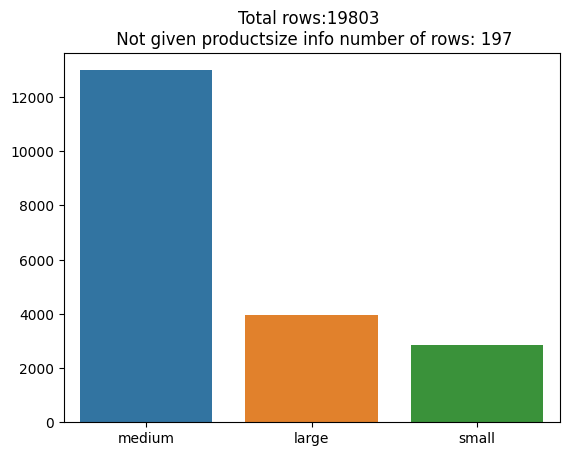

In [20]:
# product_size
product_size_cat=transactions_df['product_size'].value_counts()
sns.barplot(x=product_size_cat.index, y =product_size_cat.values).set(title=f"Total rows:{transactions_df['product_size'].count()} \n Not given productsize info number of rows: {transactions_df['product_size'].isna().sum()}")
plt.show()

In [21]:
############################  current customers demographic - Data exploration ############################################
# find columns and details datatype of each column
currentcustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  4000 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [22]:
# making sure all customers are unique. no repeatation of customer_id
cur_customers= currentcustomers_df['customer_id'].unique()
len(cur_customers)

4000

In [23]:
print("gender data categories:",currentcustomers_df['gender'].unique())
print("\n job_title data categories:",currentcustomers_df['job_title'].unique())
print("\n job industry categories:",currentcustomers_df['job_industry_category'].unique())
print("\n wealth_segment data categories:",currentcustomers_df['wealth_segment'].unique())
print("\n owns_car data categories:",currentcustomers_df['owns_car'].unique())

gender data categories: ['U' 'Male' 'Female']

 job_title data categories: ['Legal Assistant' 'Environmental Tech' 'General Manager' nan
 'Senior Sales Associate' 'Quality Control Specialist'
 'Assistant Professor' 'Research Nurse' 'Registered Nurse'
 'Tax Accountant' 'Social Worker' 'Staff Scientist'
 'Senior Financial Analyst' 'Senior Developer' 'Programmer I'
 'Structural Analysis Engineer' 'Recruiter' 'Office Assistant II'
 'Automation Specialist IV' 'Assistant Manager' 'Engineer I'
 'Food Chemist' 'Financial Analyst' 'Executive Secretary' 'Programmer II'
 'Office Assistant IV' 'Actuary' 'Computer Systems Analyst I'
 'Geologist IV' 'Budget/Accounting Analyst I' 'Research Associate'
 'Software Test Engineer IV' 'Staff Accountant II'
 'Software Test Engineer I' 'Civil Engineer' 'Accounting Assistant III'
 'Teacher' 'Internal Auditor' 'Account Executive' 'Web Designer II'
 'Accounting Assistant II' 'VP Accounting' 'Physical Therapy Assistant'
 'Project Manager' 'Business Systems Devel

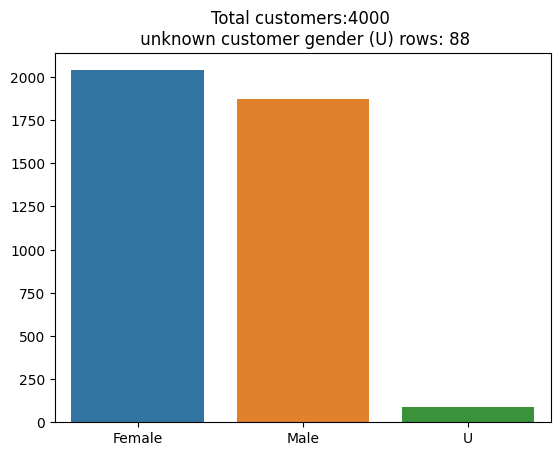

In [24]:
# visualization on classification on columns: gender,job_industry,wealth_segment,owns_Car
# Also shows the total number of data used for plot
# cust_Gender
cust_gender=currentcustomers_df['gender'].value_counts()
u_cust= (currentcustomers_df['gender'].values == "U").sum()
sns.barplot(x=cust_gender.index, y =cust_gender.values).set(title=f"Total customers:{currentcustomers_df['gender'].count()} \n unknown customer gender (U) rows: {u_cust}")
plt.show()

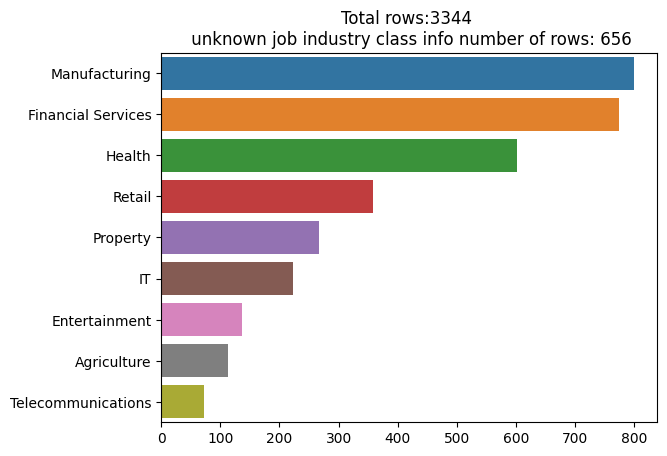

In [25]:
# job_industry_type
cust_industry_cat=currentcustomers_df['job_industry_category'].value_counts()
sns.barplot(y=cust_industry_cat.index, x =cust_industry_cat.values).set(title=f"Total rows:{currentcustomers_df['job_industry_category'].count()} \n unknown job industry class info number of rows: {currentcustomers_df['job_industry_category'].isna().sum()}")
plt.show()

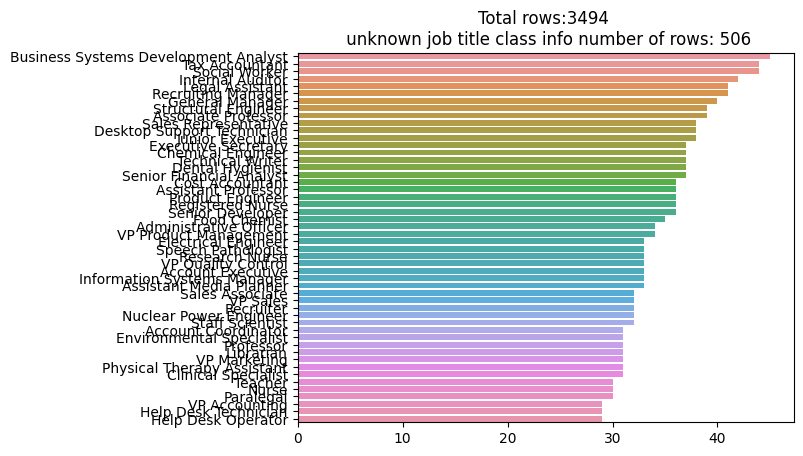

In [26]:
# job_title_type
cust_jobtitle_cat=currentcustomers_df['job_title'].value_counts()[:50]
sns.barplot(y=cust_jobtitle_cat.index, x =cust_jobtitle_cat.values).set(title=f"Total rows:{currentcustomers_df['job_title'].count()} \n unknown job title class info number of rows: {currentcustomers_df['job_title'].isna().sum()}")
# plt.figure(figsize=(3,1000))
plt.show()

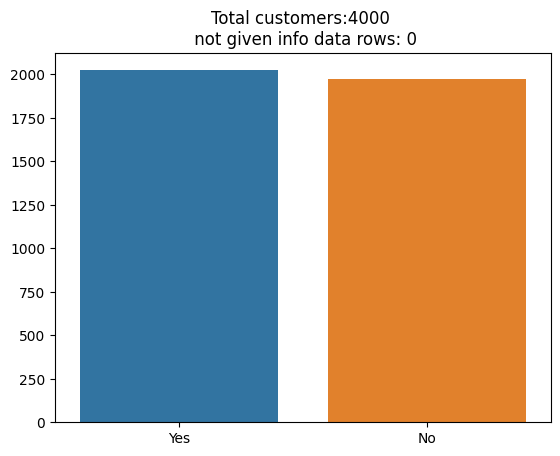

In [27]:
# cust_owned_Car
cust_owned_car=currentcustomers_df['owns_car'].value_counts()
sns.barplot(x=cust_owned_car.index, y =cust_owned_car.values).set(title=f"Total customers:{currentcustomers_df['owns_car'].count()} \n not given info data rows: {currentcustomers_df['owns_car'].isna().sum()}")
plt.show()

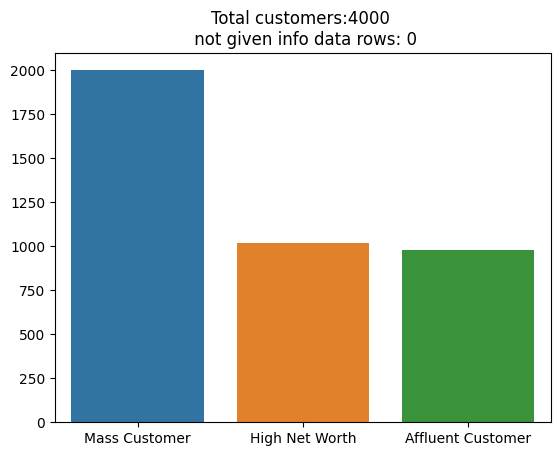

In [28]:
# cust_wealth_seg
cust_wealth_seg=currentcustomers_df['wealth_segment'].value_counts()
sns.barplot(x=cust_wealth_seg.index, y =cust_wealth_seg.values).set(title=f"Total customers:{currentcustomers_df['wealth_segment'].count()} \n not given info data rows: {currentcustomers_df['wealth_segment'].isna().sum()}")
plt.show()

In [29]:
############################  current customers address - Data exploration ############################################
# find columns and details datatype of each column
current_customer_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [30]:
# now check how many customers(From current_Customer_Demo csv file) address information is given in this csv file - use customer_id
# customer information is there, but address information is missing - we can still use customer information
currentcustomers_df['customer_id'].isin(current_customer_address_df['customer_id']).value_counts()

True     3996
False       4
Name: customer_id, dtype: int64

In [31]:
# We can customers address, but customer does not exist - address is extra information. so we can ignore this
current_customer_address_df['customer_id'].isin(currentcustomers_df['customer_id']).value_counts()

True     3996
False       3
Name: customer_id, dtype: int64

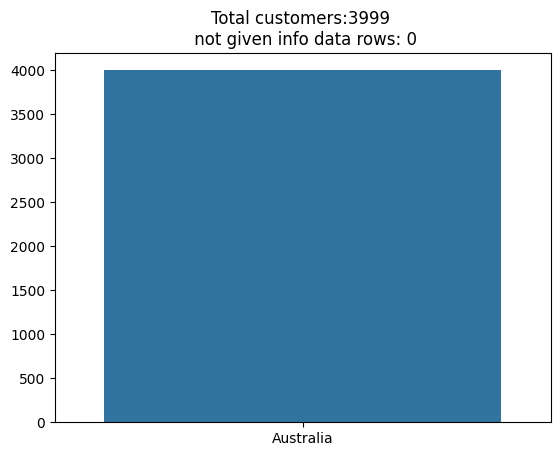

In [32]:
# let's see first all customers country list
# cust_contry_list
custs_country_list=current_customer_address_df['country'].value_counts()
sns.barplot(x=custs_country_list.index, y =custs_country_list.values).set(title=f"Total customers:{current_customer_address_df['country'].count()} \n not given info data rows: {current_customer_address_df['country'].isna().sum()}")
plt.show()

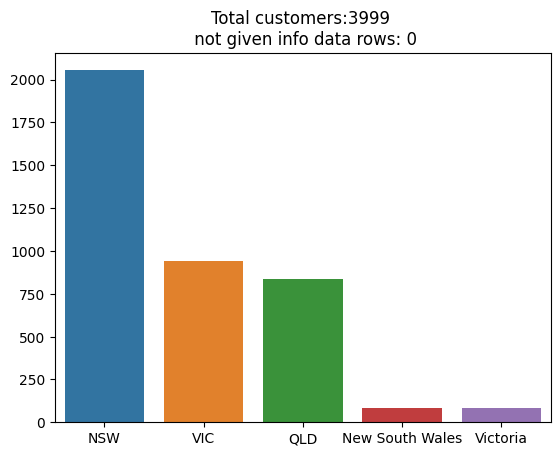

In [33]:
# let's see states list
# custs_states
custs_states=current_customer_address_df['state'].value_counts()
sns.barplot(x=custs_states.index, y =custs_states.values).set(title=f"Total customers:{current_customer_address_df['state'].count()} \n not given info data rows: {current_customer_address_df['state'].isna().sum()}")
plt.show()

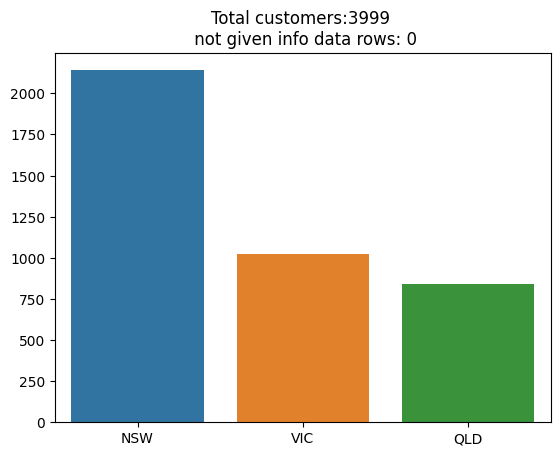

In [34]:
# VIC and Victoria are same. So let's replace Victoria to VIC 
current_customer_address_df['state'] = current_customer_address_df['state'].str.replace('Victoria','VIC')
# NSW and New South Wales are also same, so let's replace New South Wales to NSW
current_customer_address_df['state'] = current_customer_address_df['state'].str.replace('New South Wales','NSW')
# now let's see the list of states
# custs_states
custs_states=current_customer_address_df['state'].value_counts()
sns.barplot(x=custs_states.index, y =custs_states.values).set(title=f"Total customers:{current_customer_address_df['state'].count()} \n not given info data rows: {current_customer_address_df['state'].isna().sum()}")
plt.show()

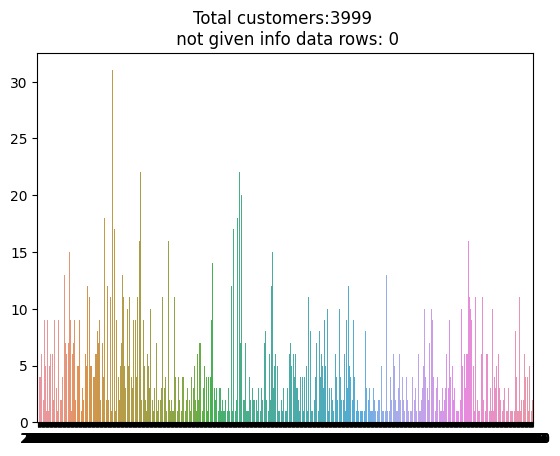

In [35]:
# let's see postcode list
# custs_postcode
custs_postcode=current_customer_address_df['postcode'].value_counts()
sns.barplot(x=custs_postcode.index, y =custs_postcode.values).set(title=f"Total customers:{current_customer_address_df['postcode'].count()} \n not given info data rows: {current_customer_address_df['postcode'].isna().sum()}")
plt.show()

In [36]:
# let's combine parts of adrress in one column with "space"
# first convert postcode to str to merge them
current_customer_address_df["postcode"]=current_customer_address_df["postcode"].apply(str)
current_customer_address_df["full_address"] = current_customer_address_df[["address", "state","postcode","country"]].apply(" ".join, axis=1)
current_customer_address_df.head()

,customer_id,address,postcode,state,country,property_valuation,full_address
0,1,060 Morning Avenue,2016,NSW,Australia,10,060 Morning Avenue NSW 2016 Australia
1,2,6 Meadow Vale Court,2153,NSW,Australia,10,6 Meadow Vale Court NSW 2153 Australia
2,4,0 Holy Cross Court,4211,QLD,Australia,9,0 Holy Cross Court QLD 4211 Australia
3,5,17979 Del Mar Point,2448,NSW,Australia,4,17979 Del Mar Point NSW 2448 Australia
4,6,9 Oakridge Court,3216,VIC,Australia,9,9 Oakridge Court VIC 3216 Australia


In [37]:
# combine customer's demographic data and address data using customer_id with join type "left"
# some customers' address are not given, those rows will be empty
cust_demo_address_df = pd.merge(currentcustomers_df,current_customer_address_df[['customer_id','full_address']], left_on = ['customer_id'], right_on = ['customer_id'],how ='left')
cust_demo_address_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_address
0,34,Jephthah Bachmann,U,59,1843-12-21,#VALUE!,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way QLD 4005 Australia
1,144,Jory Barrabeale,U,71,NaN,122,Environmental Tech,IT,Mass Customer,N,No,NaN,22 Oxford Junction NSW 2315 Australia
2,168,Reggie Broggetti,U,8,NaN,122,General Manager,IT,Affluent Customer,N,Yes,NaN,16 Golf View Center VIC 3020 Australia
3,267,Edgar Buckler,U,53,NaN,122,NaN,IT,High Net Worth,N,No,NaN,48 Arizona Drive NSW 2768 Australia
4,290,Giorgio Kevane,U,42,NaN,122,Senior Sales Associate,IT,Mass Customer,N,No,NaN,6923 Tennessee Circle NSW 2766 Australia


In [38]:
cust_demo_address_df['full_address'].describe()


count                                  3996
unique                                 3996
top       833 Luster Way QLD 4005 Australia
freq                                      1
Name: full_address, dtype: object

In [39]:
cust_without_address = cust_demo_address_df[cust_demo_address_df['full_address'].isna()]
cust_without_address

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_address
94,3,Arlin Dearle,Male,61,1954-01-20,68,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN
675,22,Deeanne Durtnell,Female,79,1962-12-10,59,NaN,IT,Mass Customer,N,No,11.0,NaN
3122,10,Fiorenze Birdall,Female,49,1988-10-11,33,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN
3500,23,Olav Polak,Male,43,1995-02-10,27,NaN,NaN,High Net Worth,N,Yes,1.0,NaN


In [40]:
cust_demo_address_df['customer_id'].describe()

count    4000.000000
mean     2000.500000
std      1154.844867
min         1.000000
25%      1000.750000
50%      2000.500000
75%      3000.250000
max      4000.000000
Name: customer_id, dtype: float64

In [41]:
############################  new customers address - Data exploration ############################################
# find columns and details datatype of each column
new_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

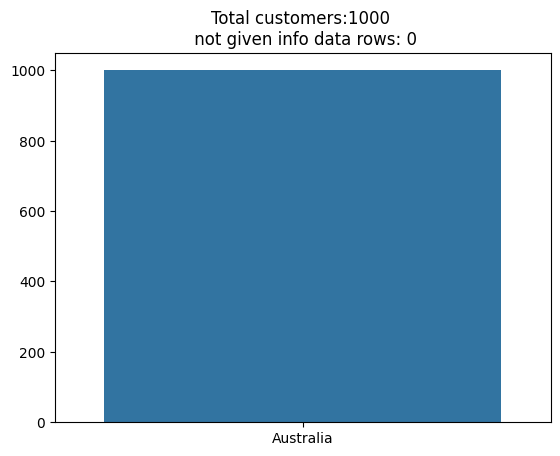

In [42]:
# let's see first all customers country list
# ncust_contry_list
ncusts_country_list=new_customers_df['country'].value_counts()
sns.barplot(x=ncusts_country_list.index, y =ncusts_country_list.values).set(title=f"Total customers:{new_customers_df['country'].count()} \n not given info data rows: {new_customers_df['country'].isna().sum()}")
plt.show()

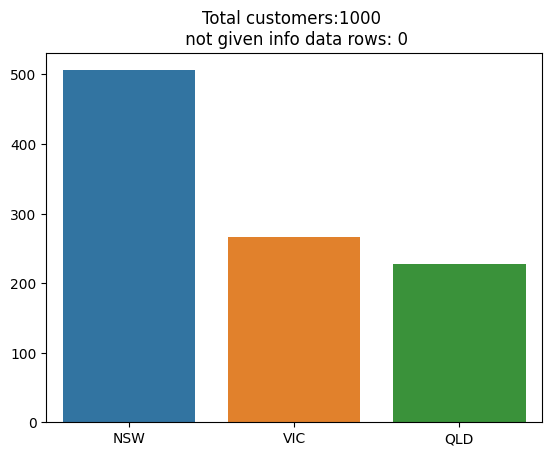

In [43]:
# let's see states list
# custs_states
ncusts_states=new_customers_df['state'].value_counts()
sns.barplot(x=ncusts_states.index, y =ncusts_states.values).set(title=f"Total customers:{new_customers_df['state'].count()} \n not given info data rows: {new_customers_df['state'].isna().sum()}")
plt.show()

In [44]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [45]:
# drop rows with "NA" values from transactions_df
transactions_df.dropna(axis=0, inplace=True)


In [46]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  object 
 12  product_first_sold_date  19445 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.1+ MB


In [47]:
# drop product_First_sold_date
transactions_df=transactions_df.drop(['product_first_sold_date'],axis=1)

In [48]:
# drop product id
transactions_df=transactions_df.drop(['product_id'],axis=1)

In [49]:
transactions_df['standard_cost']

0           $53.62 
1          $388.92 
2          $248.82 
3          $381.10 
4          $709.48 
            ...    
19995    $1,203.40 
19996      $312.74 
19997       $44.71 
19998      $136.73 
19999    $1,580.47 
Name: standard_cost, Length: 19445, dtype: object

In [50]:
# # now convert standart_cost to float
# # first remove $ symbol from it
transactions_df['standard_cost']=transactions_df['standard_cost'].str.split('$').str[1]

In [51]:
transactions_df['standard_cost']

0           53.62 
1          388.92 
2          248.82 
3          381.10 
4          709.48 
           ...    
19995    1,203.40 
19996      312.74 
19997       44.71 
19998      136.73 
19999    1,580.47 
Name: standard_cost, Length: 19445, dtype: object

In [52]:
# # remove , char from string
transactions_df['standard_cost']=transactions_df['standard_cost'].str.replace(',','')

In [53]:
transactions_df['standard_cost']

0          53.62 
1         388.92 
2         248.82 
3         381.10 
4         709.48 
           ...   
19995    1203.40 
19996     312.74 
19997      44.71 
19998     136.73 
19999    1580.47 
Name: standard_cost, Length: 19445, dtype: object

In [54]:
# convert standard_cost to float
transactions_df=transactions_df.astype({'standard_cost':'float'})

In [55]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    19445 non-null  int64  
 1   customer_id       19445 non-null  int64  
 2   transaction_date  19445 non-null  object 
 3   online_order      19445 non-null  object 
 4   order_status      19445 non-null  object 
 5   brand             19445 non-null  object 
 6   product_line      19445 non-null  object 
 7   product_class     19445 non-null  object 
 8   product_size      19445 non-null  object 
 9   list_price        19445 non-null  float64
 10  standard_cost     19442 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.8+ MB


# Cleaning of current customer dataframe

In [56]:
currentcustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  4000 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [57]:
# drop job_title and job_industry_category
currentcustomers_df=currentcustomers_df.drop(['job_title'],axis=1)
currentcustomers_df=currentcustomers_df.drop(['job_industry_category'],axis=1)

In [58]:
currentcustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  4000 non-null   object 
 6   wealth_segment                       4000 non-null   object 
 7   deceased_indicator                   4000 non-null   object 
 8   owns_car                             4000 non-null   object 
 9   tenure                               3913 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 312.6+ KB


In [59]:
# drop rows with "NA" values from currentcustomers_df
currentcustomers_df.dropna(axis=0, inplace=True)

In [60]:
currentcustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   name                                 3913 non-null   object 
 2   gender                               3913 non-null   object 
 3   past_3_years_bike_related_purchases  3913 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3913 non-null   object 
 6   wealth_segment                       3913 non-null   object 
 7   deceased_indicator                   3913 non-null   object 
 8   owns_car                             3913 non-null   object 
 9   tenure                               3913 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 336.3+ KB


In [61]:
currentcustomers_df['deceased_indicator'].value_counts()

N    3911
Y       2
Name: deceased_indicator, dtype: int64

In [62]:
# remove those 2 customers whoese deceased indicator is yes
death_index = currentcustomers_df[ currentcustomers_df['deceased_indicator'] == 'Y' ].index

# cleaning customer_address dataframe

In [63]:
current_customer_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
 6   full_address        3999 non-null   object
dtypes: int64(2), object(5)
memory usage: 218.8+ KB


# now combine all dataframe into one dataframe

In [64]:
current_cust_df = currentcustomers_df.merge(current_customer_address_df,on='customer_id',how='left')

In [65]:
current_cust_df.head()
current_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3912
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   name                                 3913 non-null   object 
 2   gender                               3913 non-null   object 
 3   past_3_years_bike_related_purchases  3913 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3913 non-null   object 
 6   wealth_segment                       3913 non-null   object 
 7   deceased_indicator                   3913 non-null   object 
 8   owns_car                             3913 non-null   object 
 9   tenure                               3913 non-null   float64
 10  address                              3909 non-null   object 
 11  postcode                      

In [66]:
current_cust_df.dropna(axis=0,inplace=True)

In [67]:
current_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3912
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3909 non-null   int64  
 1   name                                 3909 non-null   object 
 2   gender                               3909 non-null   object 
 3   past_3_years_bike_related_purchases  3909 non-null   int64  
 4   DOB                                  3909 non-null   object 
 5   age                                  3909 non-null   object 
 6   wealth_segment                       3909 non-null   object 
 7   deceased_indicator                   3909 non-null   object 
 8   owns_car                             3909 non-null   object 
 9   tenure                               3909 non-null   float64
 10  address                              3909 non-null   object 
 11  postcode                      

In [68]:
current_cust_df.to_csv('combine.csv')

In [69]:
cust_trans_df = transactions_df.merge(current_cust_df,on='customer_id',how='inner')

In [70]:
cust_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18986 entries, 0 to 18985
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       18986 non-null  int64  
 1   customer_id                          18986 non-null  int64  
 2   transaction_date                     18986 non-null  object 
 3   online_order                         18986 non-null  object 
 4   order_status                         18986 non-null  object 
 5   brand                                18986 non-null  object 
 6   product_line                         18986 non-null  object 
 7   product_class                        18986 non-null  object 
 8   product_size                         18986 non-null  object 
 9   list_price                           18986 non-null  float64
 10  standard_cost                        18986 non-null  float64
 11  name                        

In [71]:
cust_trans_df.dropna(axis=0,inplace=True)

In [85]:
 #convert transaction_date to datetime format
cust_trans_df['transaction_date']=pd.to_datetime(cust_trans_df['transaction_date'],format="%Y-%m-%d").dt.date

In [99]:
# calculate age using DOB and transaction date
def calc_age(DOB,transaction_date):
    born = datetime.strptime(str(DOB),  "%Y-%m-%d").date()
    tran_date=datetime.strptime(str(transaction_date),  "%Y-%m-%d").date()
    return tran_date.year - born.year - ((tran_date.month,tran_date.day) < (born.month, born.day))

In [100]:
# cust_trans_df['Age'] = cust_trans_df[['DOB','transaction_date']].apply(calc_age)
cust_trans_df['Age'] = cust_trans_df.apply(lambda x: calc_age(x.DOB, x.transaction_date), axis=1)

In [101]:
cust_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18986 entries, 0 to 18985
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       18986 non-null  int64  
 1   customer_id                          18986 non-null  int64  
 2   transaction_date                     18986 non-null  object 
 3   online_order                         18986 non-null  object 
 4   order_status                         18986 non-null  object 
 5   brand                                18986 non-null  object 
 6   product_line                         18986 non-null  object 
 7   product_class                        18986 non-null  object 
 8   product_size                         18986 non-null  object 
 9   list_price                           18986 non-null  float64
 10  standard_cost                        18986 non-null  float64
 11  name                        

In [102]:
# check Age result
cust_trans_df['Age']

0        62
1        62
2        62
3        38
4        38
         ..
18981    61
18982    41
18983    41
18984    41
18985    41
Name: Age, Length: 18986, dtype: int64

In [115]:
# check the differnce beetween list price and standard_cost
df = np.where(cust_trans_df['list_price'] > cust_trans_df['standard_cost'], True, False)
print(f'length of df is {len(df)} and all data have list_price greater than standard_cost as {np.unique(df)}')

length of df is 18986 and all data have list_price greater than standard_cost as [ True]


In [118]:
# now calculate the revenue from list_price and standard_cost
def cal_revenue(list_price,standard_cost):
    return list_price - standard_cost

In [119]:
cust_trans_df['Revenue'] = cust_trans_df.apply(lambda x: cal_revenue(x.list_price, x.standard_cost), axis=1)

In [120]:
cust_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18986 entries, 0 to 18985
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       18986 non-null  int64  
 1   customer_id                          18986 non-null  int64  
 2   transaction_date                     18986 non-null  object 
 3   online_order                         18986 non-null  object 
 4   order_status                         18986 non-null  object 
 5   brand                                18986 non-null  object 
 6   product_line                         18986 non-null  object 
 7   product_class                        18986 non-null  object 
 8   product_size                         18986 non-null  object 
 9   list_price                           18986 non-null  float64
 10  standard_cost                        18986 non-null  float64
 11  name                        

In [121]:
cust_trans_df.to_csv('final_cust_tran_combine.csv')